In [3]:

import pandas as pd
from bs4 import BeautifulSoup
import ast


df = pd.read_csv("~/Desktop/Anime_EDA/anime_characters.csv")  
# Step 3: Basic inspection
print(df.info())
print(df.head())

# Step 4: Drop duplicate mal_id entries
df = df.drop_duplicates(subset="mal_id")

# Step 5: Handle missing values
df["favorites"] = df["favorites"].fillna(0).astype(int)

# Step 6: Strip whitespace from text fields
for col in ["name", "name_kanji", "nicknames", "about"]:
    df[col] = df[col].astype(str).str.strip()

# Step 7: Convert 'nicknames' string to list (if formatted as Python list string)
def convert_nicknames(x):
    if pd.notnull(x) and x.startswith("["):
        try:
            return ast.literal_eval(x)
        except:
            return []
    return []

df["nicknames"] = df["nicknames"].apply(convert_nicknames)

# Step 8: Clean HTML from 'about' column
def clean_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

df["about"] = df["about"].apply(lambda x: clean_html(x) if pd.notnull(x) else x)

# Step 9: Sanitize URL columns
url_cols = ["url", "image_jpg_url", "image_webp_url", "image_webp_small_url"]
for col in url_cols:
    df[col] = df[col].fillna("").str.strip()
    df = df[df[col].str.startswith("http")]

# Step 10: Ensure mal_id is int and unique
df["mal_id"] = df["mal_id"].astype(int)
assert df["mal_id"].is_unique

# Step 11: Save cleaned file
df.to_csv("cleaned_dataset.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_dataset.csv'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202983 entries, 0 to 202982
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   mal_id                202983 non-null  int64 
 1   url                   202983 non-null  object
 2   name                  202983 non-null  object
 3   name_kanji            149711 non-null  object
 4   nicknames             29736 non-null   object
 5   favorites             202983 non-null  int64 
 6   about                 111571 non-null  object
 7   image_jpg_url         202983 non-null  object
 8   image_webp_url        202983 non-null  object
 9   image_webp_small_url  202983 non-null  object
dtypes: int64(2), object(8)
memory usage: 15.5+ MB
None
   mal_id                                                url             name  \
0       1  https://myanimelist.net/character/1/Spike_Spiegel    Spike Spiegel   
1       2  https://myanimelist.net/character/2/Faye_Valen..

/var/folders/ml/6hkz87xd7t3d7st3zr6qzgzc0000gn/T/ipykernel_38138/1808245322.py:34: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


✅ Cleaned dataset saved as 'cleaned_dataset.csv'


In [5]:
df_cleaned = pd.read_csv("cleaned_dataset.csv")
df_cleaned.head()


mal_id                                                url             name  \
0       1  https://myanimelist.net/character/1/Spike_Spiegel    Spike Spiegel   
1       2  https://myanimelist.net/character/2/Faye_Valen...   Faye Valentine   
2       3      https://myanimelist.net/character/3/Jet_Black        Jet Black   
3       4            https://myanimelist.net/character/4/Ein              Ein   
4       5  https://myanimelist.net/character/5/Ichigo_Kur...  Ichigo Kurosaki   

   name_kanji nicknames  favorites  \
0  スパイク・スピーゲル        []      48133   
1  フェイ・バレンタイン        []       9474   
2   ジェット・ブラック        []       2239   
3         アイン        []       2378   
4       黒崎 一護        []      35561   

                                               about  \
0  Birthdate: June 26, 2044 Height: 185 cm (6' 1"...   
1  Birthday: August 14, 1994  One of the members ...   
2  Jet, known on his home satellite as the "Black...   
3  Ein is a Pembroke Welsh Corgi brought aboard t...   
4  Race: Human Birthday: July 15 (Cancer) Age: 15...   

                                       image_jpg_url  \
0  https://cdn.myanimelist.net/images/characters/...   
1  https://cdn.myanimelist.net/images/characters/...   
2  https://cdn.myanimelist.net/images/characters/...   
3  https://cdn.myanimelist.net/images/characters/...   
4  https://cdn.myanimelist.net/images/characters/...   

                                      image_webp_url  \
0  https://cdn.myanimelist.net/images/characters/...   
1  https://cdn.myanimelist.net/images/characters/...   
2  https://cdn.myanimelist.net/images/characters/...   
3  https://cdn.myanimelist.net/images/characters/...   
4  https://cdn.myanimelist.net/images/characters/...   

                                image_webp_small_url  
0  https://cdn.myanimelist.net/images/characters/...  
1  https://cdn.myanimelist.net/images/characters/...  
2  https://cdn.myanimelist.net/images/characters/...  
3  https://cdn.myanimelist.net/images/characters/...  
4  https://cdn.myanimelist.net/images/characters/...

In [7]:

import pandas as pd

df = pd.read_csv("cleaned_dataset.csv")


total_characters = len(df)
avg_favorites = df["favorites"].mean()
top_char = df.loc[df["favorites"].idxmax()]
top_char_name = top_char["name"]
top_char_favorites = top_char["favorites"]
kanji_ratio = df["name_kanji"].notnull().mean() * 100


def count_nicknames(x):
    if isinstance(x, str) and x.startswith("["):
        try:
            return len(eval(x))
        except:
            return 0
    return 0

df["nickname_count"] = df["nicknames"].apply(count_nicknames)
avg_nicknames = df["nickname_count"].mean()

about_coverage = df["about"].notnull().mean() * 100

# Display KPIs
print("Anime Characters Dataset KPIs")
print("-----------------------------")
print(f"Total Characters: {total_characters:,}")
print(f"Average Favorites per Character: {avg_favorites:.2f}")
print(f"Most Favorited Character: {top_char_name} ({top_char_favorites:,} favorites)")
print(f"Percentage with Kanji Names: {kanji_ratio:.2f}%")
print(f"Average Nicknames per Character: {avg_nicknames:.2f}")
print(f"'About' Field Coverage: {about_coverage:.2f}%")


Anime Characters Dataset KPIs
-----------------------------
Total Characters: 202,699
Average Favorites per Character: 59.17
Most Favorited Character: Lelouch Lamperouge (174,599 favorites)
Percentage with Kanji Names: 73.76%
Average Nicknames per Character: 0.00
'About' Field Coverage: 54.96%


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px


df = pd.read_csv("cleaned_dataset.csv")


In [13]:
pip install WordCloud


Note: you may need to restart the kernel to use updated packages.


/var/folders/ml/6hkz87xd7t3d7st3zr6qzgzc0000gn/T/ipykernel_38138/3068053618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_chars, y="name", x="favorites", palette="mako")


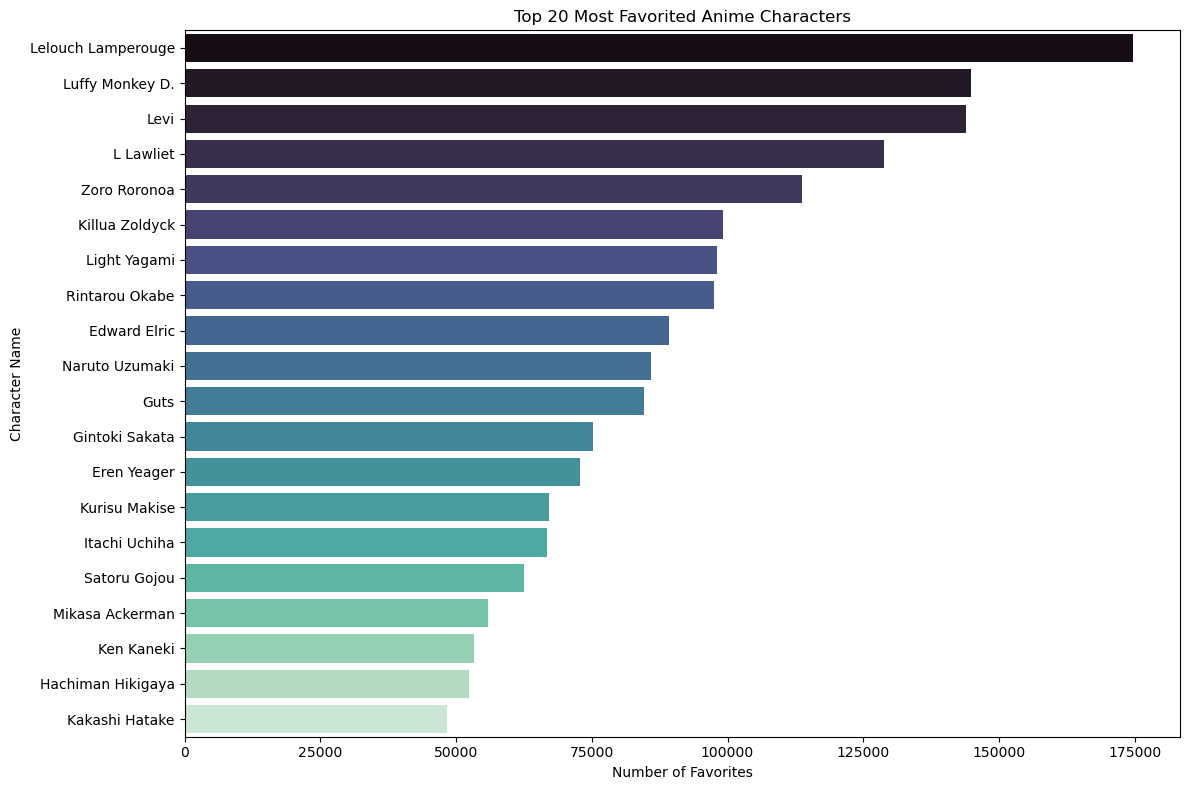

In [17]:
top_chars = df.sort_values(by="favorites", ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_chars, y="name", x="favorites", palette="mako")
plt.title("Top 20 Most Favorited Anime Characters")
plt.xlabel("Number of Favorites")
plt.ylabel("Character Name")
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


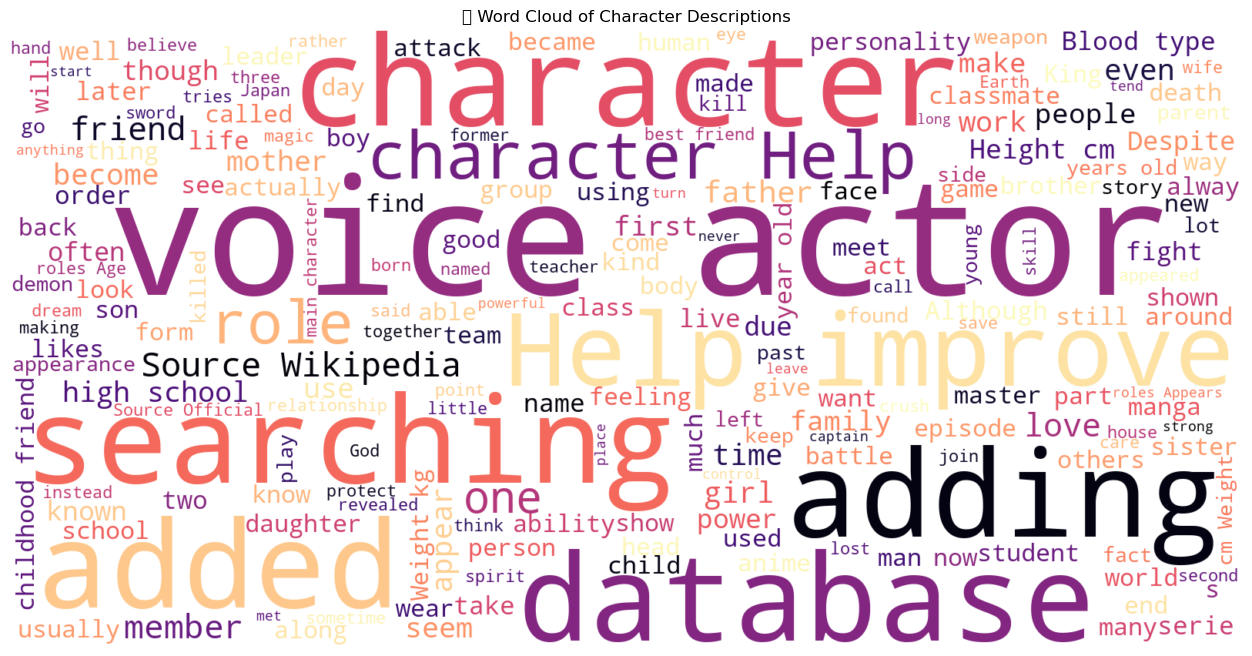

In [20]:
text = " ".join(df['about'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=1600, height=800, background_color='white', colormap='magma').generate(text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🌀 Word Cloud of Character Descriptions")
plt.show()


/var/folders/ml/6hkz87xd7t3d7st3zr6qzgzc0000gn/T/ipykernel_38138/1859182058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="has_kanji", palette="pastel")


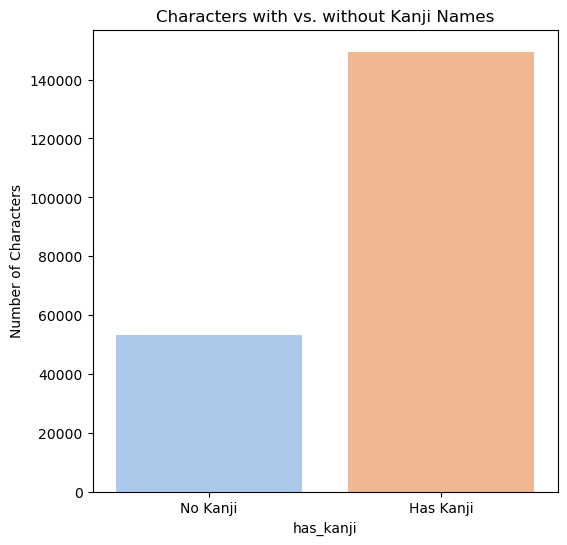

In [22]:
df["has_kanji"] = df["name_kanji"].notnull()

plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="has_kanji", palette="pastel")
plt.title("Characters with vs. without Kanji Names")
plt.xticks([0, 1], ["No Kanji", "Has Kanji"])
plt.ylabel("Number of Characters")
plt.show()


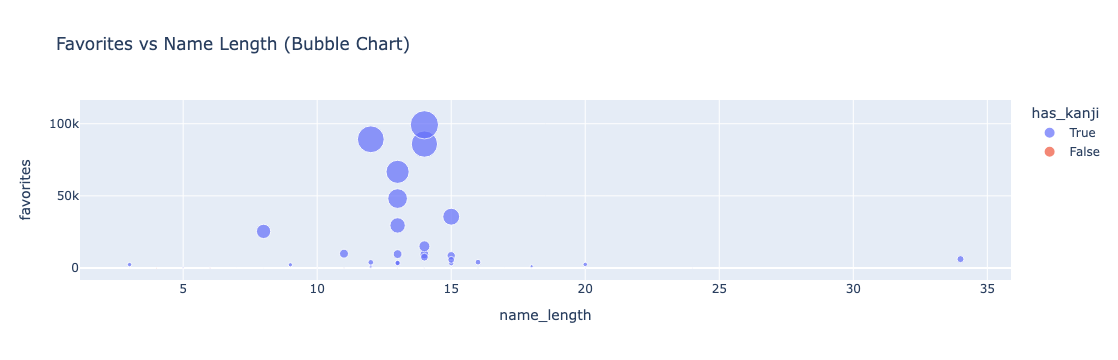

In [24]:
df["name_length"] = df["name"].apply(len)
bubble = px.scatter(df.head(500), x="name_length", y="favorites", 
                    size="favorites", color="has_kanji", 
                    hover_data=["name", "favorites"],
                    title="Favorites vs Name Length (Bubble Chart)")

bubble.show()


In [28]:
import pandas as pd


df = pd.read_csv("cleaned_dataset.csv")

# Add useful features
df["name_length"] = df["name"].apply(len)
df["has_kanji"] = df["name_kanji"].notnull().astype(int)
df["has_about"] = df["about"].notnull().astype(int)

# Nickname count
def count_nicknames(x):
    if isinstance(x, str) and x.startswith("["):
        try:
            return len(eval(x))
        except:
            return 0
    return 0

df["nickname_count"] = df["nicknames"].apply(count_nicknames)


In [30]:

features = ["name_length", "has_kanji", "has_about", "nickname_count"]
X = df[features]
y = df["favorites"]


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
y_pred_lr = lr.predict(X_test)
print("Linear Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")

# Random Forest
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Regressor:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.4f}")


Linear Regression:
RMSE: 990.34
R² Score: 0.0033

Random Forest Regressor:
RMSE: 989.90
R² Score: 0.0042
